In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mp_api.client import MPRester
from lmapr1492 import plot_brillouin_zone, get_branch_energies, get_n_branch, get_n_band
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import bandstructure

In [2]:
mp_key = "nbKtMcNjVctWQexVKEJTiT489Bo6oYrr"
mp_id = "mp-11869"

In [3]:
#Récupération de la structure des bandes
with MPRester(mp_key) as m:
    band_struct = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Bandes électroniques

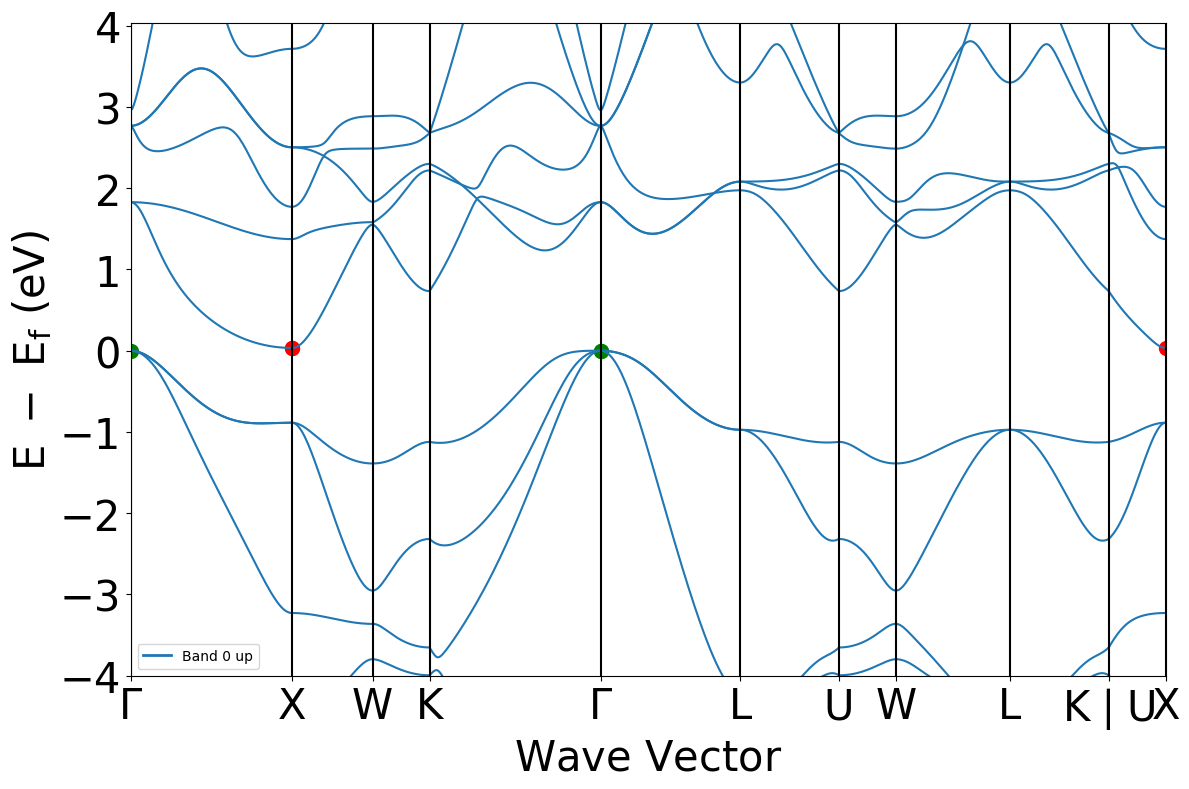

In [8]:
band = BSPlotter(band_struct)
band.get_plot(vbm_cbm_marker=True)

#Récupérer les axes
data = band.bs_plot_data()
dist = data.get('ticks').get('distance')
dist = np.array([dist[0], dist[1], dist[3], dist[5], dist[7], dist[9], dist[11], dist[13], dist[15], dist[17], dist[18]])
energy = data.get('energy')

In [9]:
plot_brillouin_zone(band_struct.structure)

### Bande interdite

La bande interdite est indirect.

Energie de la bande interdite =  0.033800000000000274 eV

Vecteur de transition:  \Gamma-X


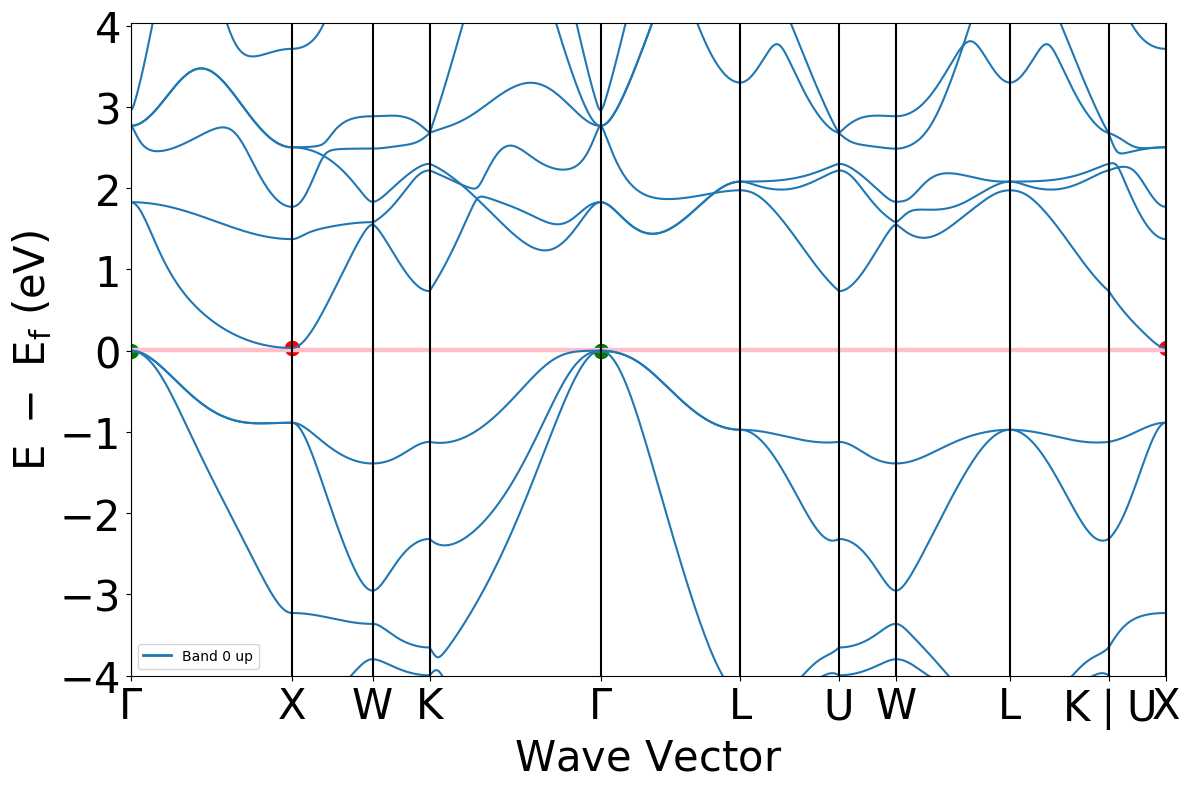

In [10]:
gap = band_struct.get_band_gap()
energie = gap.get('energy')

band.get_plot(vbm_cbm_marker=True)
#Bande interdite en évidence
plt.fill_between(np.linspace(dist[0], dist[-1], 500), 0, gap.get('energy'), color = "pink")

if gap.get('direct') == True : 
    print("La bande interdite est direct.\n")
else :
    print("La bande interdite est indirect.\n")
print("Energie de la bande interdite = ", energie, "eV\n")
print("Vecteur de transition: ",gap['transition'])


D'abord il est important de rappeler ce qu'est la bande interdite, elle correspond aux niveaux d'énergies qui ne peuvent pas être occupés par les électrons.
Comme énoncé, le gap est indirect c'est à dire que la différence entre les vecteurs d'onde des extrema (bande de conduction : points rouges et bande de valence : points verts). On pouvait l'observer facilement graphiquement.
Vu que la bande interdite est très petite (<<1eV), on peut en conclure que le matériau est un conducteur.

### Dernière bande de valence

In [13]:
vbm = band_struct.get_vbm()
energy_vbm = vbm['energy']

#Pour correspondre au graph on doit trouver l'energie au point 0
energy_0 = data.get('zero_energy')

print("Energie maximum de la dernière bande de valence = {} eV\n".format(energy_vbm))
print("Pour correspondre au plot : Energie max E-Ef =", energy_vbm - energy_0, "eV")
print("Sur le plot, les extrema correspondant à cette énergie sont les points verts.\n")
print(vbm.get('band_index'))

Energie maximum de la dernière bande de valence = 6.4186 eV

Pour correspondre au plot : Energie max E-Ef = 0.0 eV
Sur le plot, les extrema correspondant à cette énergie sont les points verts.

defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15, 16]})


### Première bande de conduction

In [16]:
cbm = band_struct.get_cbm()
energy_cbm = cbm['energy']

print("Energie minimum de la première bande de conduction = {} eV\n".format(energy_cbm))
print("Pour correspondre au plot : Energie min E-Ef =", energy_cbm - energy_0, "eV")
print("Sur le plot, les extrema correspondant à cette énergie sont les points rouges.\n")
print(cbm.get('band_index'))

Energie minimum de la première bande de conduction = 6.4524 eV

Pour correspondre au plot : Energie min E-Ef = 0.033800000000000274 eV
Sur le plot, les extrema correspondant à cette énergie sont les points rouges.

defaultdict(<class 'list'>, {<Spin.up: 1>: [17]})


In [17]:
#Dispersion
print("La dispersion dépend de la variation d'énergie du vecteur d'onde, pour la déterminer on doit donc regarder les pentes. Une pente (en valeur absolue) max/min correspondra à une dispersion max/min.")

delta_dist = np.zeros(10)
delta_energy_vbm = np.zeros(10)
delta_energy_cbm = np.zeros(10)
pente_vbm = np.zeros(10)
pente_cbm = np.zeros(10)

for i in range(10):
    delta_dist[i] = dist[i+1] - dist[i]

for j in range(10):
    delta_energy_vbm[j]= energy.get('1')[j][16][-1]-energy.get('1')[j][16][0]
    delta_energy_cbm[j]= energy.get('1')[j][17][-1]-energy.get('1')[j][17][0]
    
for k in range(10):
    pente_vbm[k] = abs(delta_energy_vbm[k]/delta_dist[k])
    pente_cbm[k] = abs(delta_energy_cbm[k]/delta_dist[k])
    
max_vbm = np.max(pente_vbm) 
print("Le plus de dispersion pour la bande de valence (flèche verte):", max_vbm)
max_cbm = np.max(pente_cbm)
print("Le plus de dispersion pour la bande de conduction (flèche rouge):", max_cbm)
min_vbm = np.min(pente_vbm)
print("Le moins de dispersion pour la bande de valence (flèche mauve):", min_vbm)
min_cbm = np.min(pente_cbm)
print("Le moins de dispersion pour la bande de conduction (flèche orange):", min_cbm)

La dispersion dépend de la variation d'énergie du vecteur d'onde, pour la déterminer on doit donc regarder les pentes. Une pente (en valeur absolue) max/min correspondra à une dispersion max/min.
Le plus de dispersion pour la bande de valence (flèche verte): 1.138003061548542
Le plus de dispersion pour la bande de conduction (flèche rouge): 3.072987499371887
Le moins de dispersion pour la bande de valence (flèche mauve): 0.24708794258698558
Le moins de dispersion pour la bande de conduction (flèche orange): 0.17062444422971276


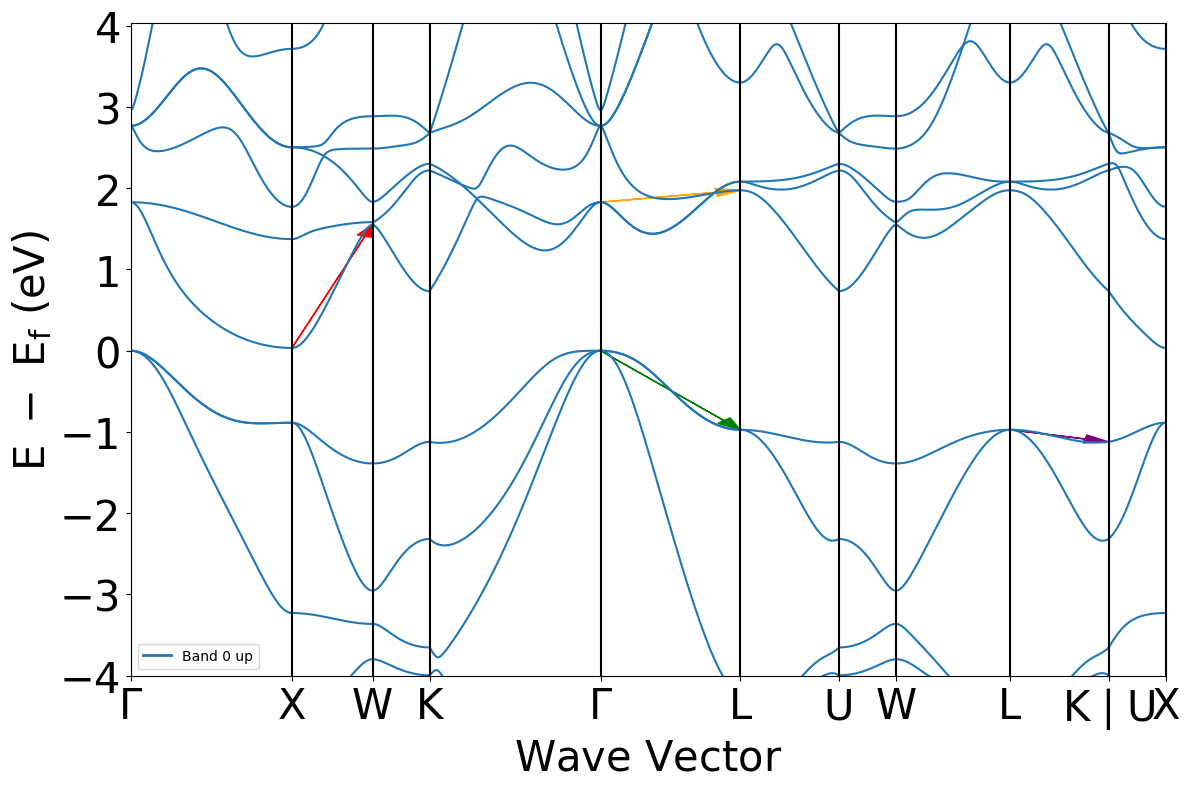

In [18]:
band.get_plot(vbm_cbm_marker=False)
plt.arrow(dist[4], (energy.get('1')[4][16])[0], delta_dist[4], delta_energy_vbm[4], color = 'green', head_width = 0.1,length_includes_head=True)
plt.arrow(dist[1], (energy.get('1')[1][17])[0], delta_dist[1], delta_energy_cbm[1], color = 'red', head_width = 0.1,length_includes_head=True)
plt.arrow(dist[8], (energy.get('1')[8][16])[0], delta_dist[8], delta_energy_vbm[8], color = 'purple', head_width = 0.1,length_includes_head=True)
plt.arrow(dist[4], (energy.get('1')[4][17])[0], delta_dist[4], delta_energy_cbm[4], color = 'orange', head_width = 0.1,length_includes_head=True)
plt.show()

En résumé :

La plus grande dispersion pour la dernière bande de valence a lieu sur Gamma-L et vaut 1.138. Elle est représentée par la flèche verte.

La plus petite dispersion pour la dernière bande de valence a lieu sur L-KI et vaut 0.247. Elle est représentée par la flèche mauve.

La plus grande dispersion pour la première bande de conduction a lieu sur X-W et vaut 3.073. Elle est représentée par la flèche rouge.

La plus petite dispersion pour la première bande de conduction a lieu sur Gamma-L et vaut 0.171. Elle est représentée par la flèche orange.

### Masse effective

Vu que nous supposons une dispersion parabolique, on a comme formule pour déterminer la masse effective :
$m^* = \frac{\hbar^2 k^2}{2 E(k)} = \frac{\hbar^2 (k_x^2 + k_y^2 + k_z^2)}{2 E(k)}$.
Où E(k) est l'énergie d'un électron de vecteur d'onde k, $\hbar$ est la constante de Planck divisé par 2$\pi$.
Attention, cette formule n'est utilisable uniquement si la norme du vecteur d'onde est non-nulle.

In [27]:
k_vbm = vbm.get('kpoint').frac_coords
print("La norme du vecteur k pour la bande de valence est ",np.linalg.norm(k_vbm))

k_cbm = cbm.get('kpoint').frac_coords
print("La norme du vecteur k pour la bande de conduction est ",np.linalg.norm(k_cbm))

La norme du vecteur k pour la bande de valence est  0.0
La norme du vecteur k pour la bande de conduction est  0.7071067811865476


#### Dernière bande de valance

Dans ce cas-ci, on a une norme de vecteur d'onde nulle donc pour pouvoir utiliser la fomule énoncée au-dessus, on doit modifier le vecteur d'onde afin qu'il n'ai pas une norme nulle. Pour cela, nous allons utiliser la propriété de périodicité $E_{n,k} = E_{n,k+j}$ de sortde que le "nouveau" vecteur j soit de norme $|j| = n \frac{2\pi}{a}$ pour tout n entier.

In [28]:
hbar = 6.5821e-16

#Norme de a déterminer dans le fichier lattice.ipykernel
a = 4.46796629259
#norme de j
j = 2*np.pi/a

meff_vbm = (hbar**2*j**2)/(2*(energy_vbm))
print("La masse effective à la base de la dernière bande de valence =",meff_vbm, "kg")

La masse effective à la base de la dernière bande de valence = 6.674190607259737e-32 kg


#### Première bande de conduction 

Ici, la norme du vecteur d'onde est non-nulle donc on peut utiliser la formule énoncée au début de la sous-section.

In [29]:
meff_cbm = (hbar**2*(k_cbm[0]**2+k_cbm[1]**2+k_cbm[2])**2)/(2*(energy_cbm))
print("La masse effective à la base de la première bande de conduction =",meff_cbm, "kg")

La masse effective à la base de la première bande de conduction = 1.8884269985296168e-32 kg
